In [1]:
%matplotlib inline 

In [2]:
from matplotlib import pyplot as plt
import numpy as np

In [3]:
data = [[3,1.5,1],
        [2,1,0],
        [4,1.5,1],
        [3,1,0],
        [3.5,0.5,1],
        [2,0.5,0],
        [5.5,1,1],
        [1,1,0]]
mystery_flower = [4.5,1]

In [5]:
'''w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()'''

In [10]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_p(x):
    return sigmoid(x) * (1 - sigmoid(x))

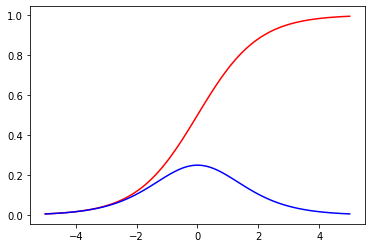

In [12]:
X = np.linspace(-5,5,100)
#Y = sigmoid(X)
plt.plot(X,sigmoid(X),c='r')
plt.plot(X,sigmoid_p(X),c='b')

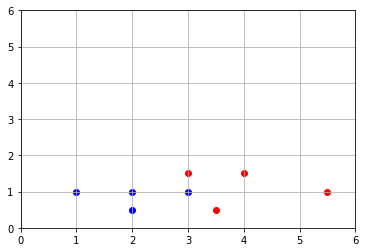

In [19]:
# scatter data
plt.axis([0,6,0,6])
plt.grid()
for i in range(len(data)):
    point = data[i]
    color = 'r'
    if point[2] == 0:
        color = 'b'
    plt.scatter(point[0],point[1],c=color)

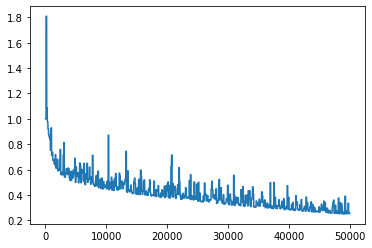

In [45]:
# training loop

learning_rate = 0.2
costs = []

w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

for i in range(1,50000):
    ri = np.random.randint(len(data))
    point = data[ri]
    
    z = point[0] * w1 + point[1] * w2 + b
    pred = sigmoid(z)
    
    target = point[2]
    cost = np.square(h - target)
    
    #costs.append(cost)
    
    dcost_pred = 2 * (pred - target)
    dpred_dz = sigmoid_p(z)
    
    dz_dw1 = point[0]
    dz_dw2 = point[1]
    dz_db = 1
    
    dcost_dz = dcost_pred * dpred_dz
    
    dcost_dw1 = dcost_dz * dz_dw1
    dcost_dw2 = dcost_dz * dz_dw2
    dcost_db = dcost_dz * dz_db
    
    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    b = b - learning_rate * dcost_db
    
    if i % 100 ==0:
        cost_sum = 0
        for j in range(len(data)):
            p = data[j]
            
            z = p[0] * w1 + p[1] * w2 + b
            pred = sigmoid(z)
        
            target = p[2] 
            cost_sum += np.square(pred - target)
    
    costs.append(cost_sum)
    
plt.plot(costs)

In [46]:
# checking model predictions

for i in range(len(data)):
    point = data[i]
    print(point)
    
    z = point[0] * w1 + point[1] * w2 + b
    pred = sigmoid(z)
    print("pred={}".format(pred))

[3, 1.5, 1]
pred=0.7996032038645587
[2, 1, 0]
pred=0.0007340804459822871
[4, 1.5, 1]
pred=0.9997588935048729
[3, 1, 0]
pred=0.43292106012263154
[3.5, 0.5, 1]
pred=0.8248277464025022
[2, 0.5, 0]
pred=0.00014053451041480436
[5.5, 1, 1]
pred=0.9999999623748489
[1, 1, 0]
pred=7.069027291041837e-07


In [47]:
z = mystery_flower[0] * w1 + mystery_flower[1] * w1 + b
pred = sigmoid(z)
pred

0.9999989721850341

In [54]:
import os

In [55]:
def which_flower(length,width):
    z = length * w1 + width * w2 + b
    pred = sigmoid(z)
    if pred < 0.5:
        os.system("say Blue flower")
    else:
        os.system("say Red flower")

In [56]:
which_flower(1,1)